# CUSTOMER CHURN PREDICTION

## Import Libraries

In [135]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt

## Data Loading

In [137]:
churn_pred = pd.read_csv("customer_churn_data .csv")
churn_pred.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


## No of columns

In [139]:
print(churn_pred.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


## Displaying summary 

In [141]:
churn_pred.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


## Shape of the data

### Shape 

In [144]:
churn_pred.shape

(5880, 21)

### Missing value

In [146]:
missing_values = churn_pred.isna().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Duplicate values

In [148]:
churn_pred.duplicated().value_counts() 

False    5880
Name: count, dtype: int64

## Summary Statistics

In [150]:
summary_stat = churn_pred.describe()
print(summary_stat)

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    5880.000000  5880.000000     5880.000000   5880.000000
mean        0.500680    36.549150       70.157779   2566.813165
std         0.500042    20.909674       28.804615   1910.017743
min         0.000000     1.000000       20.000000     20.030000
25%         0.000000    18.000000       45.717500   1020.217500
50%         1.000000    37.000000       70.155000   2136.445000
75%         1.000000    55.000000       95.457500   3767.665000
max         1.000000    72.000000      119.990000   8589.600000


## Box Plot 

<Axes: xlabel='Churn', ylabel='count'>

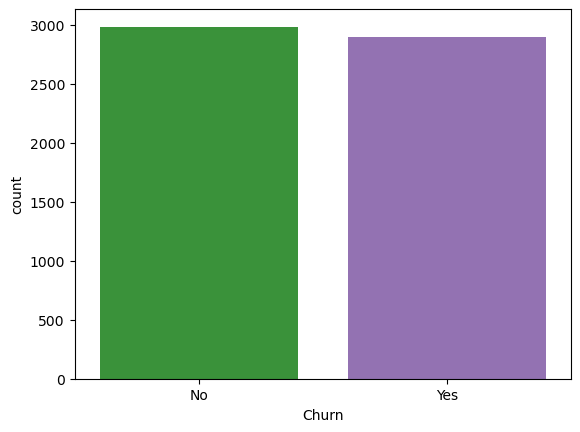

In [152]:
#churners and non-churners
sns.countplot(data=churn_pred, x='Churn', hue='Churn', palette=['#2ca02c', '#9467bd'], legend=False)

## Count of TARGET Variable per category

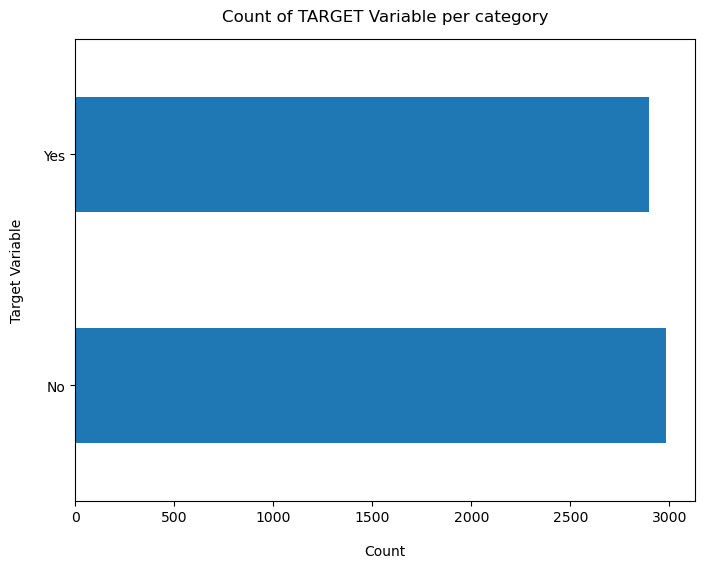

In [154]:
churn_pred['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

## Percentge of TARGET Variable per category

In [156]:
100*churn_pred['Churn'].value_counts()/len(churn_pred['Churn'])

Churn
No     50.714286
Yes    49.285714
Name: count, dtype: float64

## TARGET Variable value count for each category

In [158]:
churn_pred['Churn'].value_counts()

Churn
No     2982
Yes    2898
Name: count, dtype: int64

#### Data is balanced, with Non churners ratio = 50.714286% and churners ratio = 49.285714.
#### Total number of Non churners are 2982.
#### Total number of churners are 2898.
#### But we will analyse the data with other features while taking the target values separately to get some insights.

## DATA CLEANING 

In [161]:
churn_pred_copy = churn_pred.copy() #Create a copy of data for processing
churn_pred_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [162]:
churn_pred_copy.describe(include=['object']).T

,count,unique,top,freq
customerID,5880,5880,CUST0000,1
gender,5880,2,Male,2950
Partner,5880,2,Yes,2995
Dependents,5880,2,No,3004
PhoneService,5880,2,Yes,2941
MultipleLines,5880,3,No phone service,2939
InternetService,5880,3,No,2029
OnlineSecurity,5880,3,No internet service,2029
OnlineBackup,5880,3,No internet service,2029
DeviceProtection,5880,3,No internet service,2029


In [163]:
print(churn_pred_copy['tenure'].max())

72


In [164]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
churn_pred_copy['tenure_group'] = pd.cut(churn_pred_copy.tenure, range(1, 80, 12), right=False, labels=labels)
churn_pred_copy['tenure_group'].value_counts()

tenure_group
13 - 24    1019
61 - 72     998
49 - 60     996
1 - 12      982
37 - 48     957
25 - 36     928
Name: count, dtype: int64

### columns not required for processing

In [166]:
churn_pred_copy.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

In [167]:
churn_pred_copy.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            5880 non-null   object  
 1   SeniorCitizen     5880 non-null   int64   
 2   Partner           5880 non-null   object  
 3   Dependents        5880 non-null   object  
 4   PhoneService      5880 non-null   object  
 5   MultipleLines     5880 non-null   object  
 6   InternetService   5880 non-null   object  
 7   OnlineSecurity    5880 non-null   object  
 8   OnlineBackup      5880 non-null   object  
 9   DeviceProtection  5880 non-null   object  
 10  TechSupport       5880 non-null   object  
 11  StreamingTV       5880 non-null   object  
 12  StreamingMovies   5880 non-null   object  
 13  Contract          5880 non-null   object  
 14  PaperlessBilling  5880 non-null   object  
 15  PaymentMethod     5880 non-null   object  
 16  MonthlyCharges    5880 n

## EDA(Exploratory Data Analysis)

## Univariate Analysis

### 1. Plot distibution of individual predictors by churn

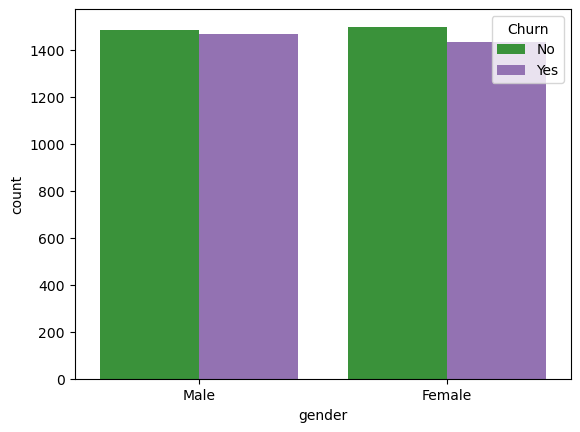

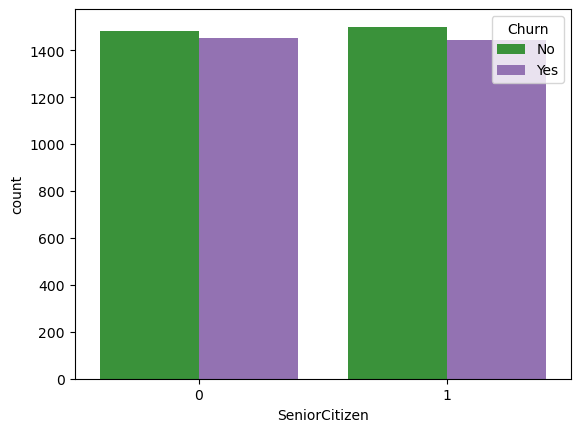

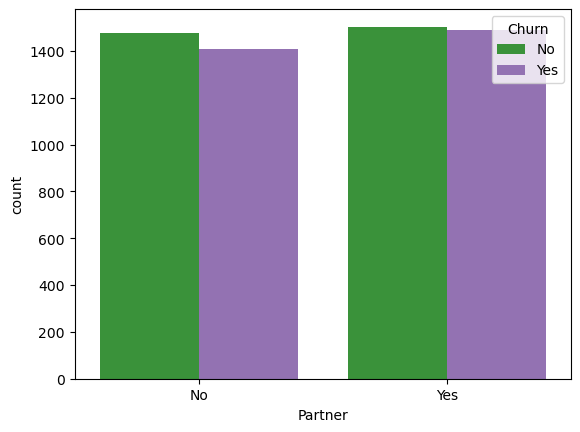

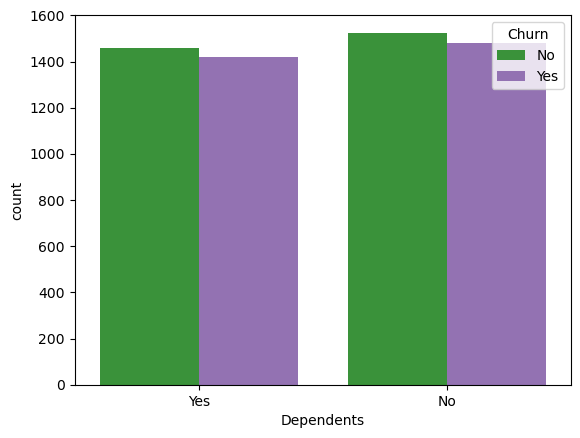

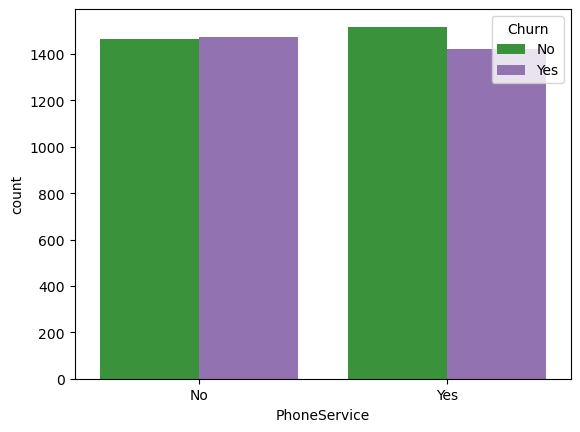

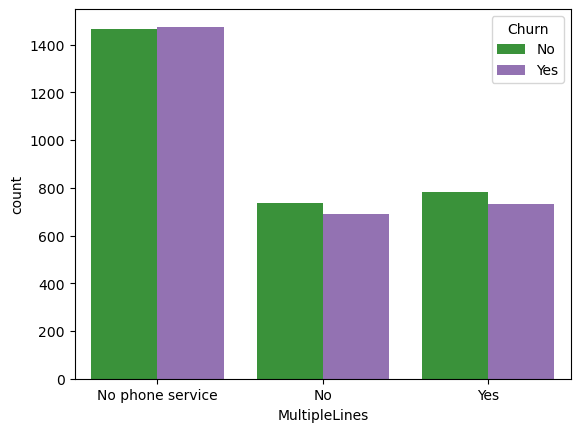

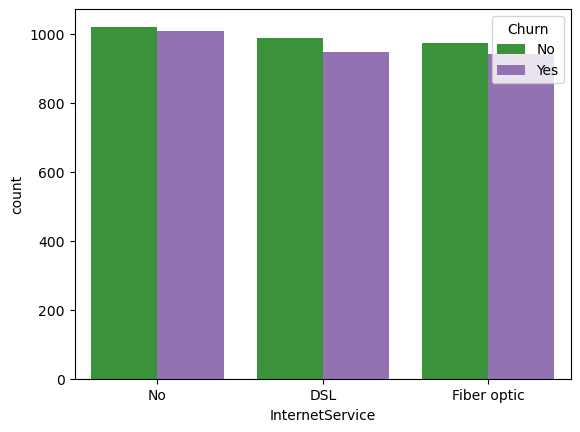

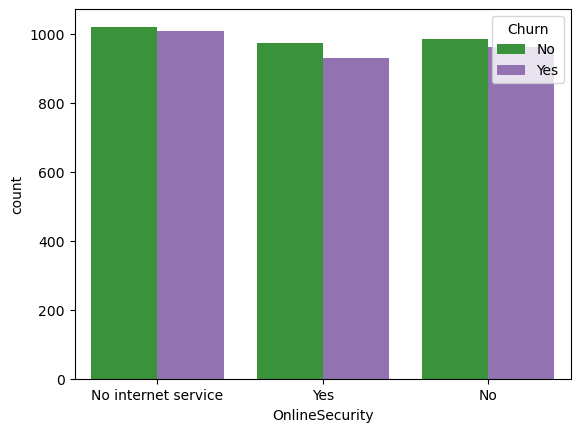

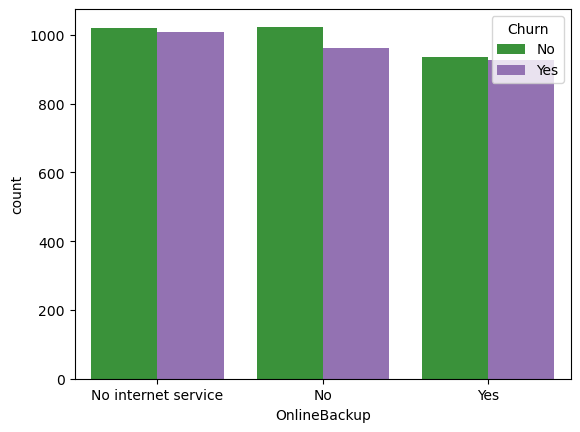

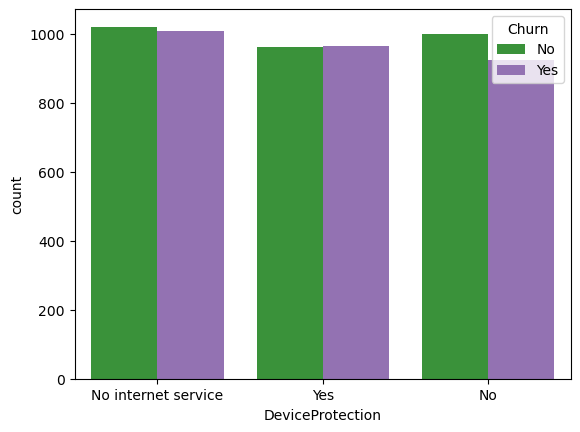

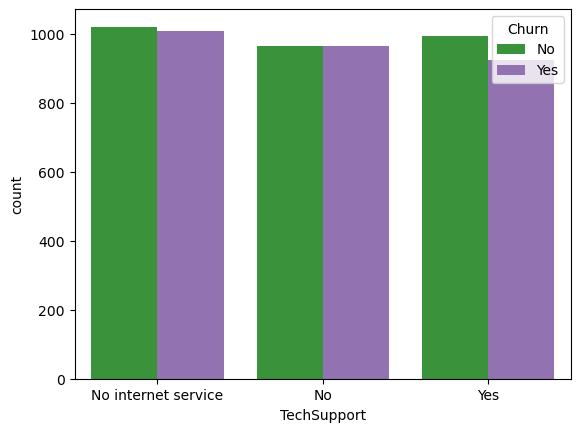

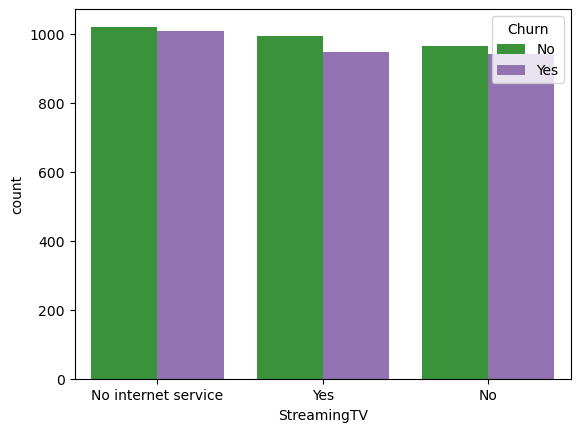

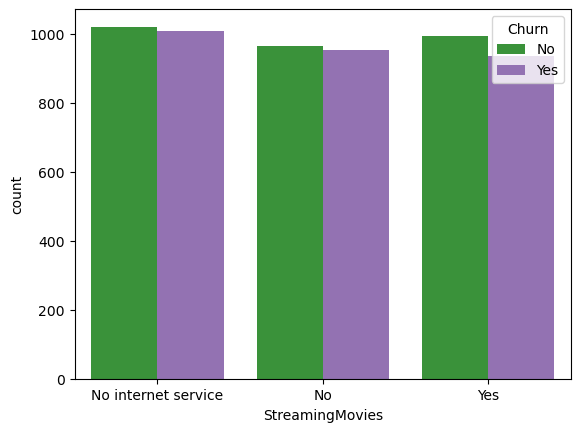

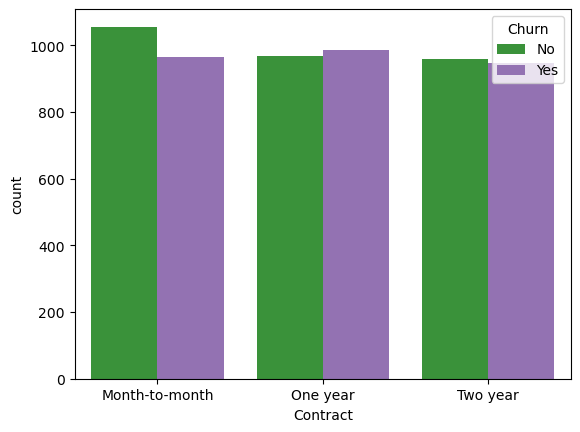

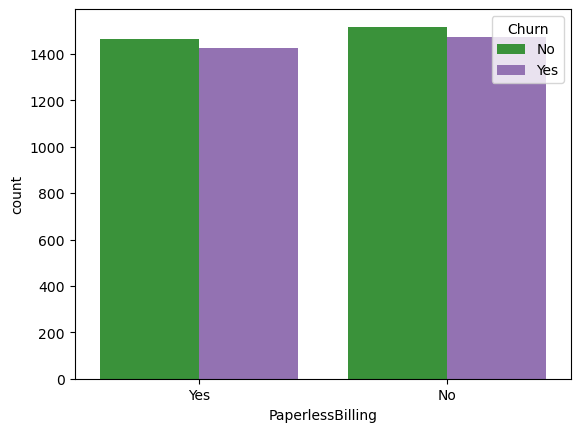

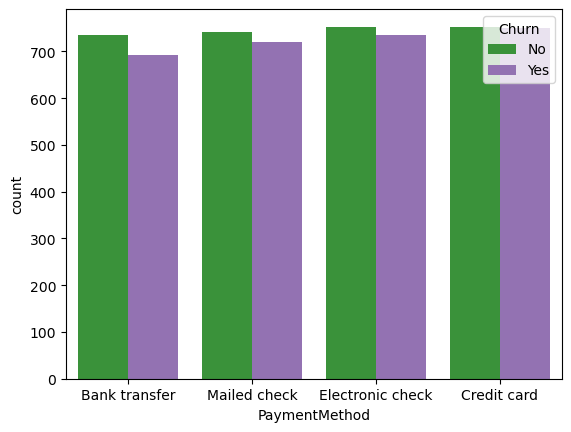

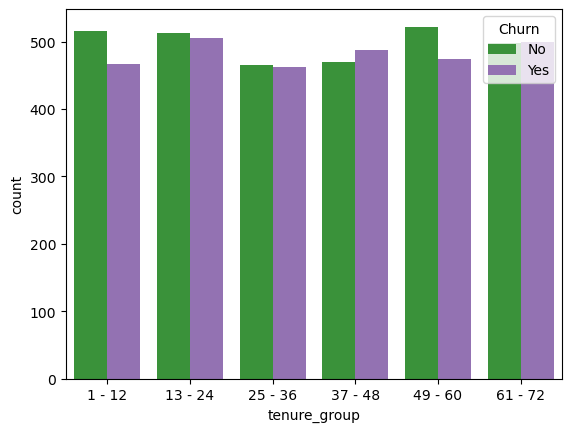

In [169]:
for i, predictor in enumerate(churn_pred_copy.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=churn_pred_copy, x=predictor, hue='Churn', palette=['#2ca02c', '#9467bd'])

### 2.Make a copy of churn_pred_copy for Bivariat analysis

In [202]:
churn_pred_bivariat = churn_pred_copy.copy()

In [206]:
#Convert Binary Variables
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_columns:
    churn_pred_bivariat[col] = churn_pred_bivariat[col].map({'Yes': 1, 'No': 0})

In [210]:
#One-Hot Encode Non-Binary Categorical Variables
non_binary_columns = [
     'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
     'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
     'StreamingMovies', 'Contract', 'PaymentMethod'
 ]
churn_pred_bivariat = pd.get_dummies(churn_pred_bivariat, columns=non_binary_columns, drop_first=True)

In [212]:
#Convert Target Variable (Churn)
churn_pred_bivariat['Churn'] = churn_pred_bivariat['Churn'].map({'Yes': 1, 'No': 0})

In [216]:
#Ensure all columns are numeric
churn_pred_bivariat = churn_pred_bivariat.map(
     lambda x: 1 if x is True else (0 if x is False else x)
 )
print(churn_pred_bivariat.dtypes)

SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
tenure_group                            category
gender_Male                                int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineBackup_No internet service           int64
OnlineBackup_Yes                           int64
DeviceProtection_No internet service       int64
DeviceProtection_Yes                       int64
TechSupport_No inter

In [220]:
tenure_mapping = {
     '1 - 12': 1,
     '13 - 24': 2,
     '25 - 36': 3,
     '37 - 48': 4,
     '49 - 60': 5,
     '61 - 72': 6
}
#Map the tenure groups to numeric values
churn_pred_bivariat['tenure_group'] = churn_pred_bivariat['tenure_group'].map(tenure_mapping)

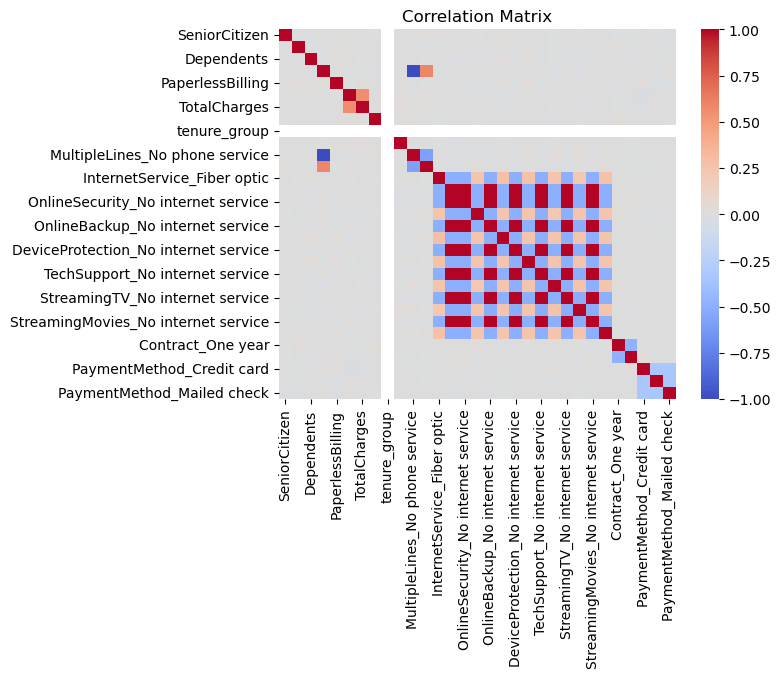

In [222]:
#Correlation Matrix
correlation_matrix = churn_pred_bivariat.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

In [224]:
churn_pred_copy['Churn'] = np.where(churn_pred_copy.Churn == 'Yes',1,0)

### 3. Convert all the categorical variables into dummy variables

In [228]:
churn_pred_dummies = pd.get_dummies(churn_pred_copy).astype(int)
churn_pred_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,49,1146,0,0,1,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,100,4330,1,1,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
2,1,97,4963,1,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,1,101,7299,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,1,52,1305,1,0,1,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [230]:
print(churn_pred_dummies.dtypes)

SeniorCitizen                           int32
MonthlyCharges                          int32
TotalCharges                            int32
Churn                                   int32
gender_Female                           int32
gender_Male                             int32
Partner_No                              int32
Partner_Yes                             int32
Dependents_No                           int32
Dependents_Yes                          int32
PhoneService_No                         int32
PhoneService_Yes                        int32
MultipleLines_No                        int32
MultipleLines_No phone service          int32
MultipleLines_Yes                       int32
InternetService_DSL                     int32
InternetService_Fiber optic             int32
InternetService_No                      int32
OnlineSecurity_No                       int32
OnlineSecurity_No internet service      int32
OnlineSecurity_Yes                      int32
OnlineBackup_No                   

### 4.Relationship between Monthly Charges and Total Charges

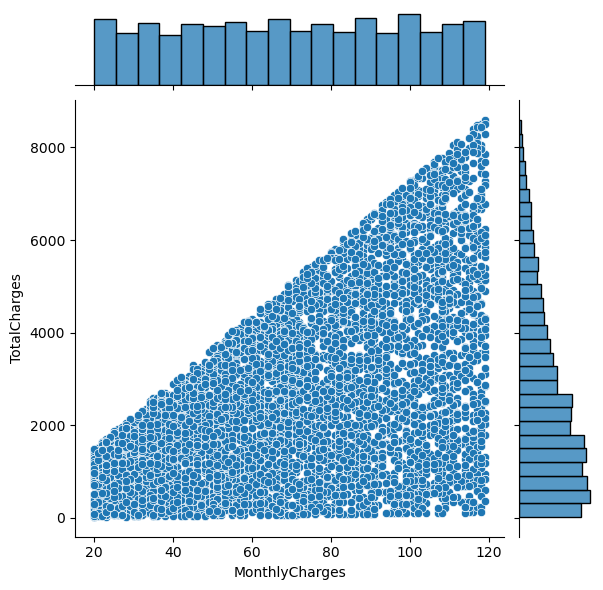

In [235]:
sns.jointplot(data=churn_pred_dummies, x='MonthlyCharges', y='TotalCharges', kind='scatter')

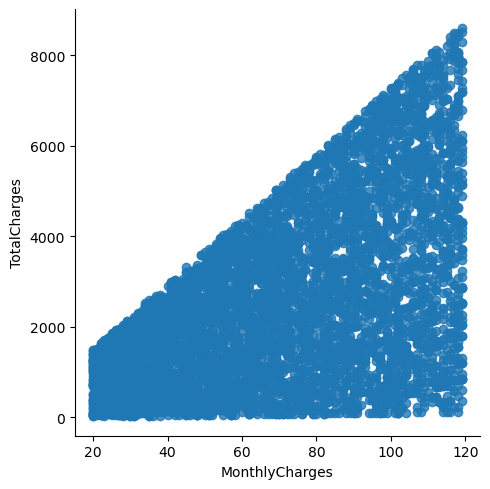

In [237]:
sns.lmplot(data=churn_pred_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

### 5.Monthly Charges by Churn

Text(0.5, 1.0, 'Monthly charges by churn')

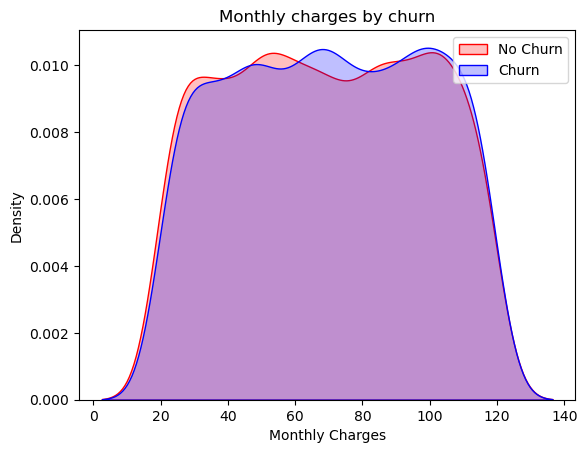

In [244]:
Mth = sns.kdeplot(churn_pred_dummies.MonthlyCharges[(churn_pred_dummies["Churn"] == 0) ],
                color="Red", fill= True)
Mth = sns.kdeplot(churn_pred_dummies.MonthlyCharges[(churn_pred_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

### 6.Total Charges by Churn.

Text(0.5, 1.0, 'Total charges by churn')

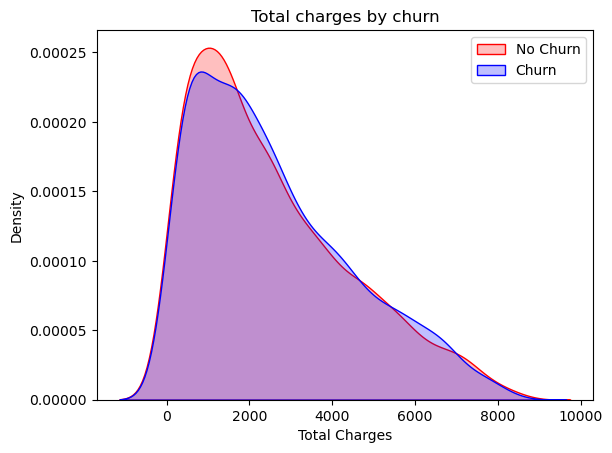

In [249]:
Tot = sns.kdeplot(churn_pred_dummies.TotalCharges[(churn_pred_dummies["Churn"] == 0) ],
                color="Red", fill= True)
Tot = sns.kdeplot(churn_pred_dummies.TotalCharges[(churn_pred_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", fill= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

### 7. Build a corelation of all predictors with 'Churn'

<Axes: >

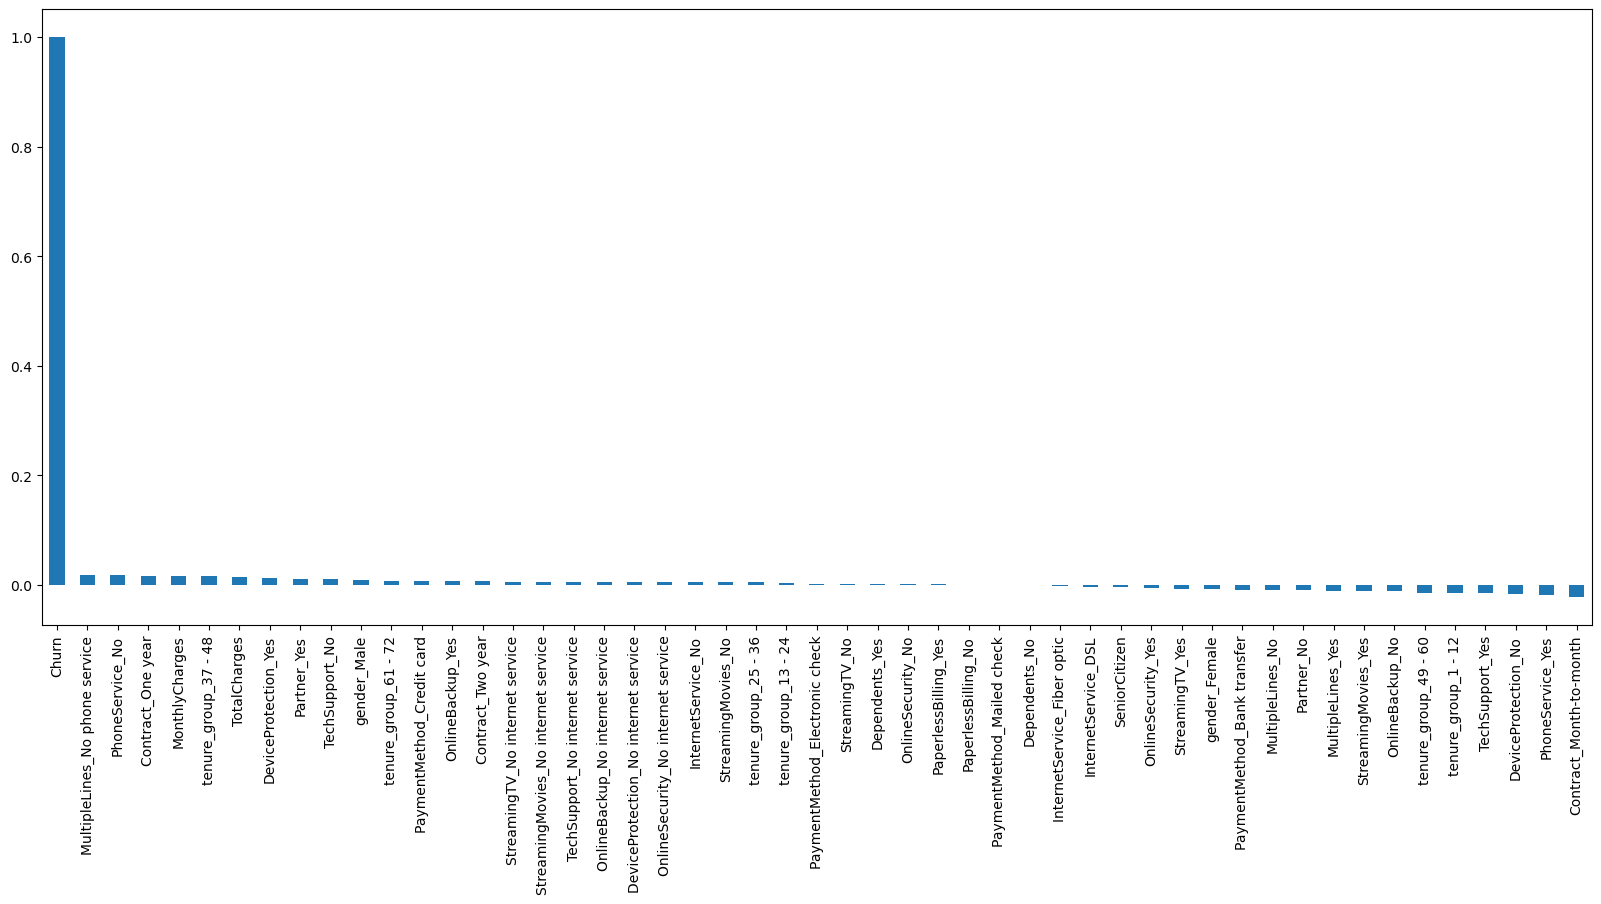

In [252]:
plt.figure(figsize=(20,8))
churn_pred_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

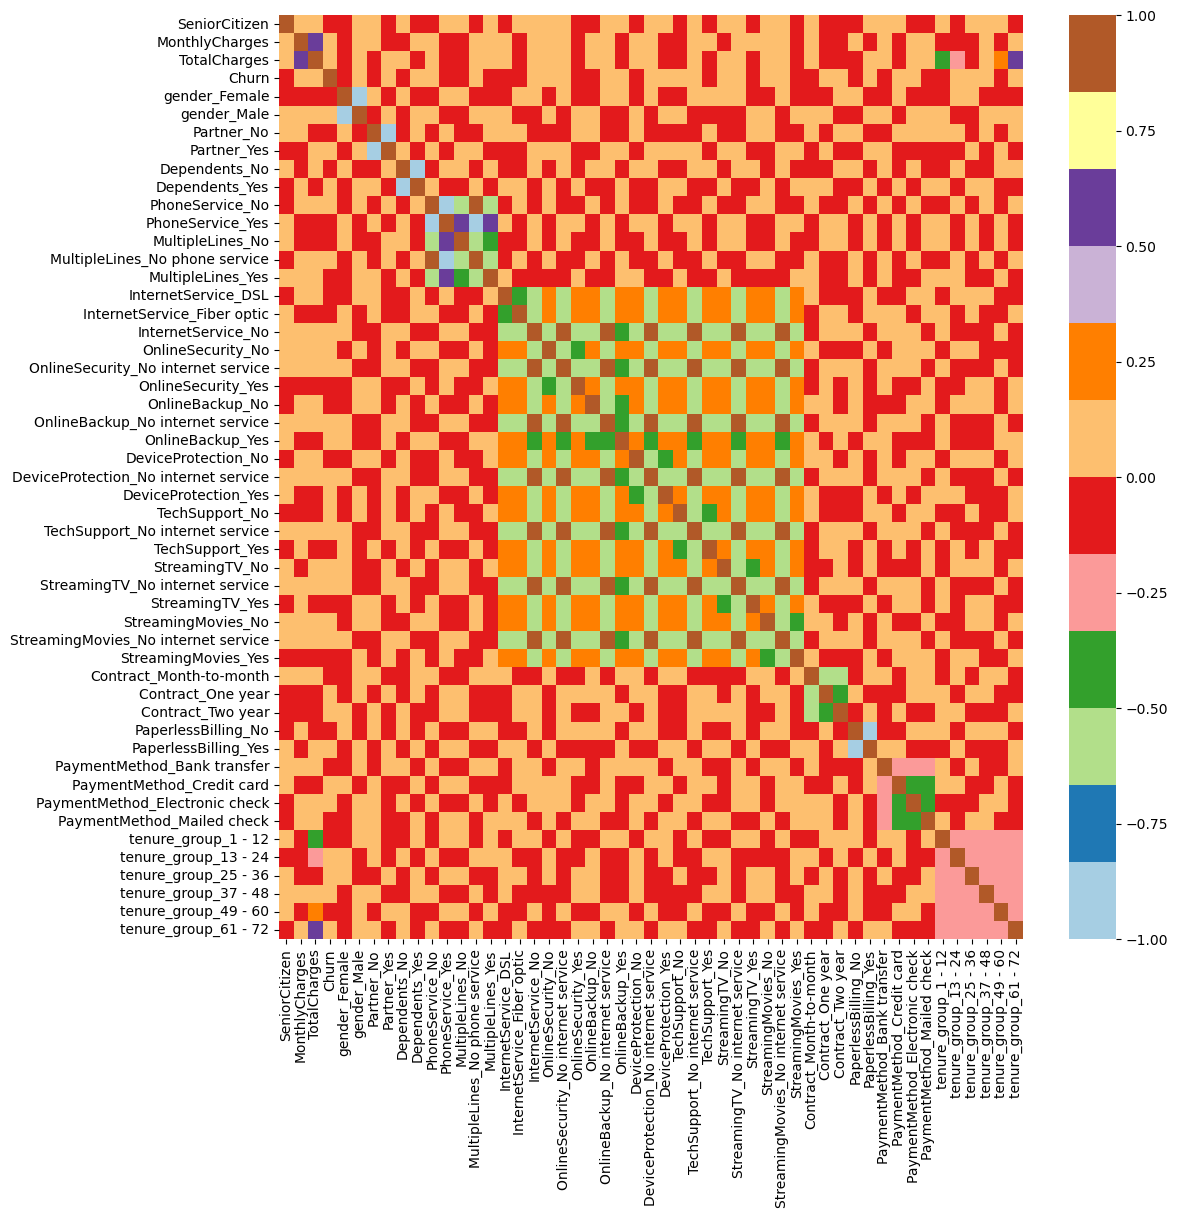

In [254]:
plt.figure(figsize=(12,12))
sns.heatmap(churn_pred_dummies.corr(), cmap="Paired")

## Bivariate Analysis

In [258]:
new_df1_target0=churn_pred_copy.loc[churn_pred_copy["Churn"]==0]
new_df1_target1=churn_pred_copy.loc[churn_pred_copy["Churn"]==1]

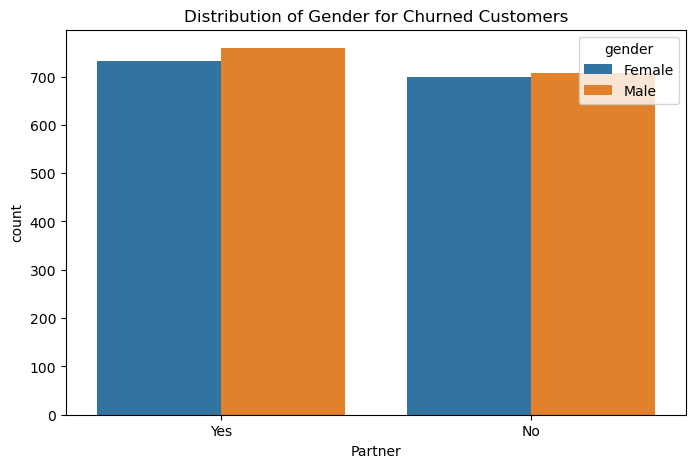

In [291]:
def uniplot(new_df1_target1, col='Partner', title='Distribution of Partner Status for Churned Customers', hue='gender_Male'):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=new_df1_target1, x=col, hue=hue)
    plt.title(title)
    plt.show()
uniplot(new_df1_target1, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')

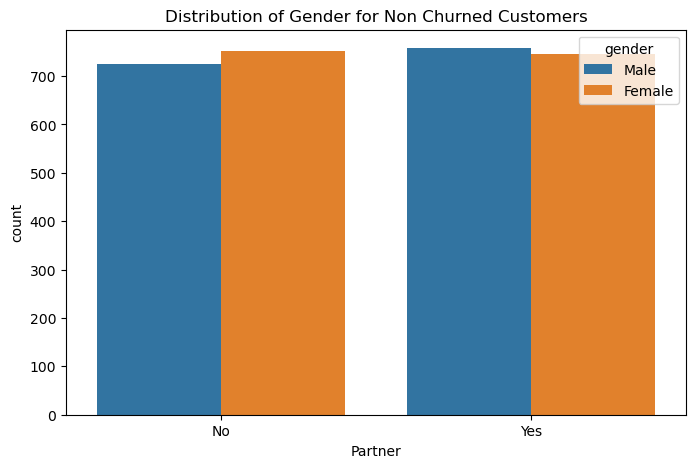

In [293]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

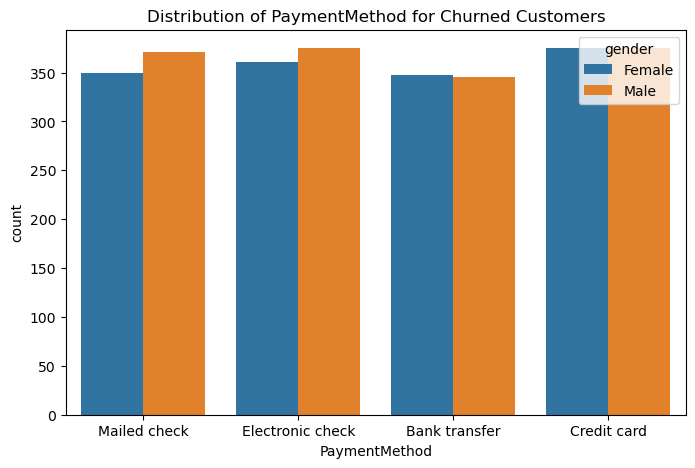

In [295]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

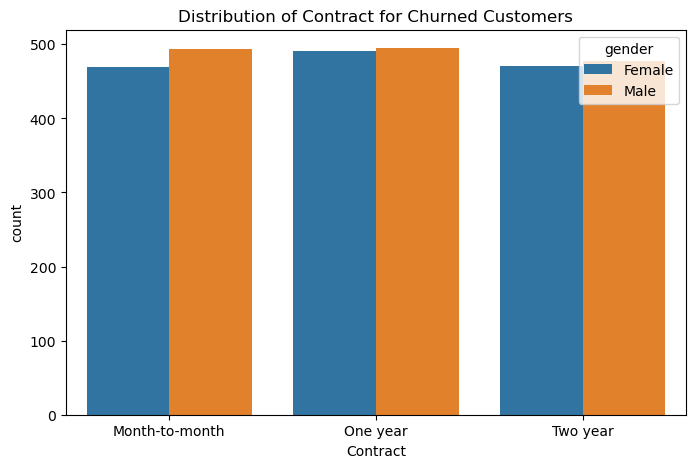

In [297]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

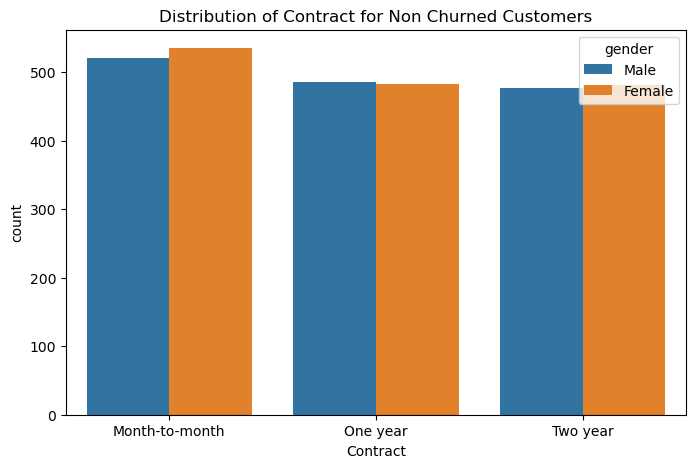

In [299]:
uniplot(new_df1_target0,col='Contract',title='Distribution of Contract for Non Churned Customers',hue='gender')

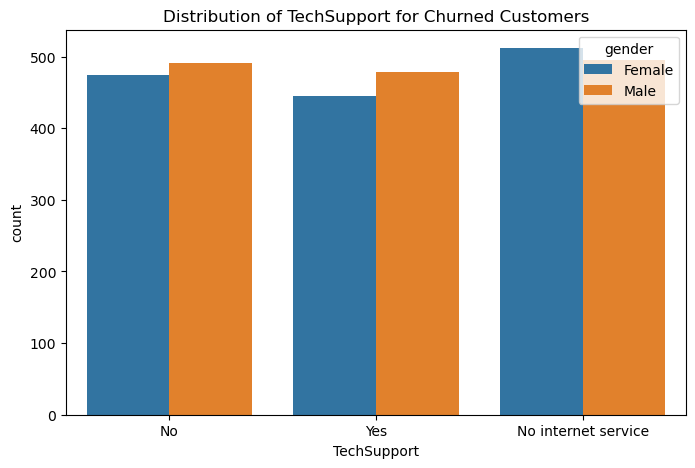

In [301]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

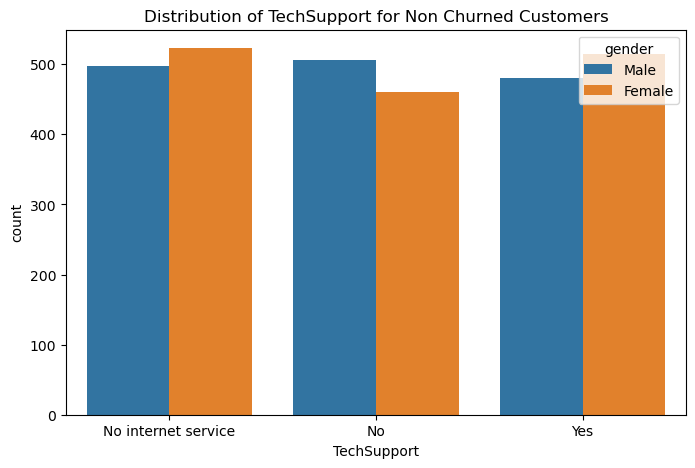

In [303]:
uniplot(new_df1_target0,col='TechSupport',title='Distribution of TechSupport for Non Churned Customers',hue='gender')

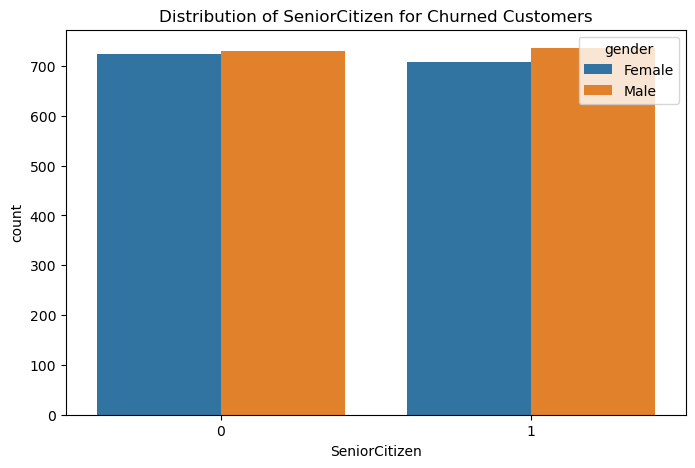

In [305]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

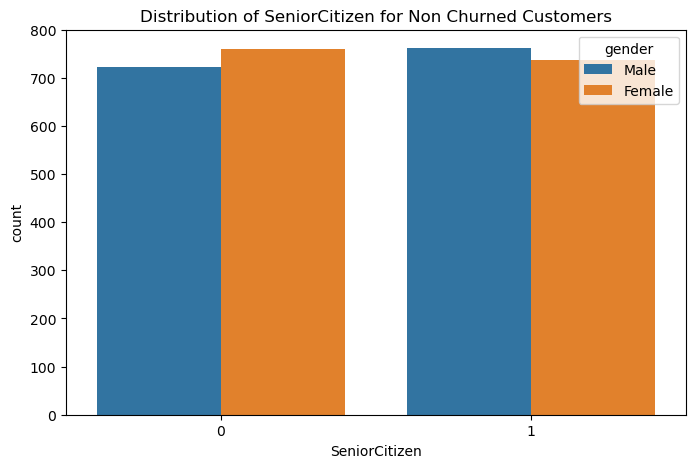

In [307]:
uniplot(new_df1_target0,col='SeniorCitizen',title='Distribution of SeniorCitizen for Non Churned Customers',hue='gender')

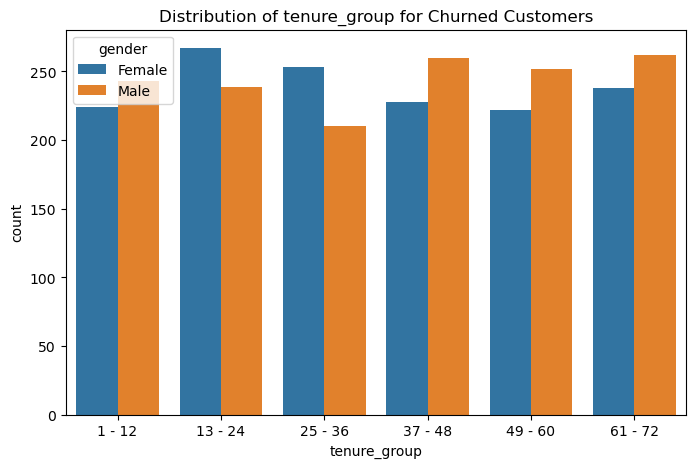

In [309]:
uniplot(new_df1_target1,col='tenure_group',title='Distribution of tenure_group for Churned Customers',hue='gender')

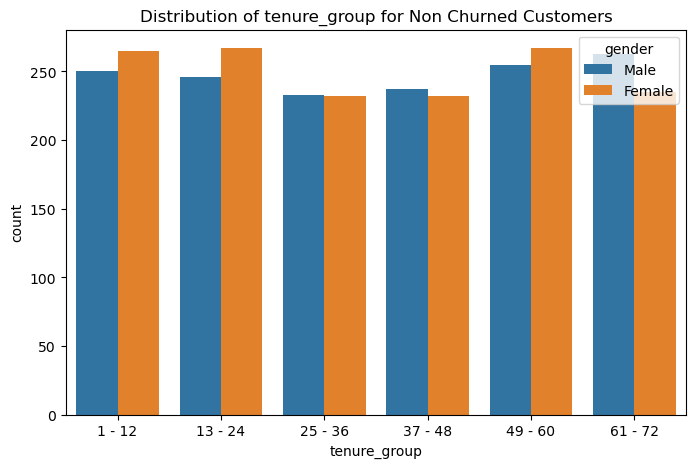

In [311]:
uniplot(new_df1_target0,col='tenure_group',title='Distribution of tenure_group for Non Churned Customers',hue='gender')

In [313]:
churn_pred_dummies.to_csv('churn_pred.csv')

# Create Model

In [316]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [318]:
churn_pred_model=pd.read_csv("churn_pred.csv")

In [326]:
churn_pred_model.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,49,1146,0,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1,0,100,4330,1,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0
2,2,1,97,4963,1,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
3,3,1,101,7299,0,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,1
4,4,1,52,1305,1,0,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0


In [328]:
churn_pred_model=churn_pred_model.drop('Unnamed: 0',axis=1)

In [330]:
x=churn_pred_model.drop('Churn',axis=1)
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,49,1146,0,1,1,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
1,0,100,4330,1,0,0,1,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,1,97,4963,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,101,7299,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,52,1305,0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [332]:
y=churn_pred_model['Churn']
y

0       0
1       1
2       1
3       0
4       1
       ..
5875    0
5876    1
5877    0
5878    0
5879    1
Name: Churn, Length: 5880, dtype: int64

In [334]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Decision Tree Classifier

In [346]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train, y_train)
y_pred = model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [348]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [350]:
model_dt.score(x_test,y_test)

0.4991496598639456

In [352]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.51      0.64      0.56       600
           1       0.48      0.36      0.41       576

    accuracy                           0.50      1176
   macro avg       0.50      0.50      0.49      1176
weighted avg       0.50      0.50      0.49      1176



### Random Forest

In [355]:
from sklearn.ensemble import RandomForestClassifier

In [357]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [359]:
y_pred = model_rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [361]:
model_rf.score(x_test,y_test)

0.5085034013605442

In [363]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.52      0.59      0.55       600
           1       0.50      0.42      0.46       576

    accuracy                           0.51      1176
   macro avg       0.51      0.51      0.50      1176
weighted avg       0.51      0.51      0.51      1176



### Performing PCA

In [366]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_

In [368]:
model_pca=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_pca.fit(x_train_pca,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [370]:
y_pred_pca = model_pca.predict(x_test_pca)
y_pred_pca

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [372]:
model_pca.score(x_test_pca,y_test)

0.5348639455782312

In [374]:
print(classification_report(y_test, y_pred_pca, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.54      0.64      0.58       600
           1       0.53      0.43      0.47       576

    accuracy                           0.53      1176
   macro avg       0.53      0.53      0.53      1176
weighted avg       0.53      0.53      0.53      1176

